# DS2500 Final Project Machine Learning Code
# Aryan Jain, Cathreen Paul, Nalika Palayoor

In [58]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [59]:
# Loading in the dataset and putting it into a DF

file_path = '/Users/aryn/Desktop/DS2500/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2016.csv'

df = pd.read_csv(file_path)

df.head()

/var/folders/7v/y47p9sxs6fz15p9nflvx9pk40000gn/T/ipykernel_1973/3871997795.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Private Health Insurance,NaN,0,N,N,3913.23,3466.83
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,NaN,NaN,0,N,Y,3597.10,3746.80
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Federal/State/Local/VA,NaN,0,N,Y,9149.22,8322.10
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicaid,NaN,0,N,Y,5880.61,5828.87
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,7019.76,6604.00


# Exploring the Data and finding trends

In [60]:
counties = df['Hospital County'].unique()
counties

array(['Allegany', nan, 'Cattaraugus', 'Erie', 'Chautauqua', 'Niagara',
       'Genesee', 'Chemung', 'Wyoming', 'Orleans', 'Monroe', 'Albany',
       'Livingston', 'Ontario', 'Schuyler', 'Steuben', 'Wayne', 'Broome',
       'Cayuga', 'Yates', 'Oswego', 'Chenango', 'Cortland', 'Jefferson',
       'Oneida', 'Herkimer', 'Lewis', 'Madison', 'Onondaga',
       'St Lawrence', 'Tompkins', 'Saratoga', 'Columbia', 'Montgomery',
       'Otsego', 'Clinton', 'Rensselaer', 'Schenectady', 'Delaware',
       'Franklin', 'Essex', 'Fulton', 'Warren', 'Dutchess', 'Schoharie',
       'Orange', 'Putnam', 'Rockland', 'Sullivan', 'Westchester',
       'Ulster', 'Bronx', 'Kings', 'Manhattan', 'Richmond', 'Queens',
       'Suffolk', 'Nassau'], dtype=object)

In [61]:
region = df['Health Service Area'].unique()
region

array(['Western NY', nan, 'Finger Lakes', 'Capital/Adirond',
       'Southern Tier', 'Central NY', 'Hudson Valley', 'New York City',
       'Long Island'], dtype=object)

In [62]:
num_rows = df.shape[0]

In [63]:
eth = df['Ethnicity'].unique()
race = df['Race'].unique()
ages = df['Age Group'].unique()
print(eth)
print(race)
print(ages)

['Not Span/Hispanic' 'Spanish/Hispanic' 'Unknown' 'Multi-ethnic']
['White' 'Black/African American' 'Other Race' 'Multi-racial']
['70 or Older' '30 to 49' '50 to 69' '18 to 29' '0 to 17']


In [64]:
pay = df['Payment Typology 1'].unique()
pay

array(['Medicare', 'Self-Pay', 'Blue Cross/Blue Shield', 'Medicaid',
       'Private Health Insurance', 'Federal/State/Local/VA',
       'Miscellaneous/Other', 'Department of Corrections',
       'Managed Care, Unspecified', 'Unknown'], dtype=object)

In [65]:
eth_average = df.groupby('Ethnicity')['Total Charges'].mean().reset_index()
eth_average

,Ethnicity,Total Charges
0,Multi-ethnic,57319.055744
1,Not Span/Hispanic,46876.345225
2,Spanish/Hispanic,43172.780187
3,Unknown,36203.005180


In [66]:
race_average = df.groupby('Race')['Total Charges'].mean().reset_index()
race_average

,Race,Total Charges
0,Black/African American,46445.626534
1,Multi-racial,59342.118168
2,Other Race,46486.360140
3,White,45358.394600


In [67]:
age_average = df.groupby('Race')['Total Charges'].mean().reset_index()
age_average

,Race,Total Charges
0,Black/African American,46445.626534
1,Multi-racial,59342.118168
2,Other Race,46486.360140
3,White,45358.394600


In [68]:
stay_average = df.groupby('Length of Stay')['Total Charges'].mean().reset_index()
stay_average

,Length of Stay,Total Charges
0,1,19570.979746
1,2,19432.491457
2,3,27213.713967
3,4,34880.432496
4,5,42172.022019
...,...,...
222,95,808682.693976
223,96,664625.669028
224,97,696050.824805
225,98,640362.495857


In [69]:
apr = df['APR Severity of Illness Description'].unique()
apr

array(['Moderate', 'Minor', 'Major', 'Extreme', nan], dtype=object)

In [70]:
apr_average = df.groupby('APR Severity of Illness Code')['Total Charges'].mean().reset_index()
apr_average

,APR Severity of Illness Code,Total Charges
0,0,37161.088358
1,1,25758.697841
2,2,36298.124478
3,3,59312.172592
4,4,159792.585620


In [71]:
fact_average = df.groupby('Facility Name')['Total Charges'].mean().reset_index()
fact_average

,Facility Name,Total Charges
0,Adirondack Medical Center-Saranac Lake Site,23887.614977
1,Albany Medical Center - South Clinical Campus,17509.673333
2,Albany Medical Center Hospital,49755.513866
3,Albany Memorial Hospital,21093.769200
4,Alice Hyde Medical Center,12522.657261
...,...,...
209,Womans Christian Assoc Hospital - WCA Hosp at ...,8698.345196
210,Women And Children's Hospital Of Buffalo,27385.776598
211,Woodhull Medical & Mental Health Center,25502.816210
212,Wyckoff Heights Medical Center,25137.263112


In [72]:
gender_average = df.groupby('Gender')['Total Charges'].mean().reset_index()
gender_average

,Gender,Total Charges
0,F,42206.111803
1,M,50750.526314
2,U,32142.952281


## Making the first Regression model, for Risk of Mortality

In [73]:
# Creating a second dataframe to perform analysis, taking a random sample of the original dataframe to cut time on processing
# df2 will be used to predict Risk of Mortality

df2 = pd.DataFrame()

df2 = df.sample(n=10000, random_state=42)
df2.reset_index(drop=True, inplace=True)

# Display the first few rows of df2
print(df2.head())

df2.shape

  Health Service Area Hospital County  Operating Certificate Number  \
0       New York City       Manhattan                     7002001.0   
1       New York City           Kings                     7002002.0   
2         Long Island         Suffolk                     5154001.0   
3       New York City           Bronx                     7000008.0   
4       New York City       Manhattan                     7002009.0   

   Facility Id                           Facility Name Age Group  \
0       1438.0                Bellevue Hospital Center  30 to 49   
1       1324.0                    Mount Sinai Brooklyn  50 to 69   
2        925.0  Good Samaritan Hospital Medical Center  50 to 69   
3       1172.0  Lincoln Medical & Mental Health Center  30 to 49   
4       1445.0                  Harlem Hospital Center  50 to 69   

  Zip Code - 3 digits Gender                    Race          Ethnicity  ...  \
0                 100      M              Other Race   Spanish/Hispanic  ...   
1   

(10000, 34)

In [74]:
# Features for Risk of Mortality
df2 = df2[["Hospital County", "Age Group", "Length of Stay", "Patient Disposition", "Type of Admission", "CCS Diagnosis Code", "APR Severity of Illness Code", "APR Risk of Mortality", "Emergency Department Indicator"]]

In [75]:
# Evalutating the columns in df2
column_types = df2.dtypes

print("Data types of variables in each column:")
print(column_types)

Data types of variables in each column:
Hospital County                   object
Age Group                         object
Length of Stay                    object
Patient Disposition               object
Type of Admission                 object
CCS Diagnosis Code                 int64
APR Severity of Illness Code       int64
APR Risk of Mortality             object
Emergency Department Indicator    object
dtype: object


In [76]:
# Check the unique values in the column
print(df2['Length of Stay'].unique())

['2' '4' '1' '3' '6' '50' '11' '9' '5' '10' 6 '17' '7' '12' 1 '15' '8'
 '13' 7 3 5 2 '14' 4 16 8 '18' '23' '20' '22' '120 +' 14 '26' 23 '77' '32'
 '24' 11 '16' '21' 24 '33' '53' '19' 9 '31' '69' '52' '27' '28' '74' '61'
 10 '117' '25' '29' 33 '43' '59' 12 '34' '30' '42' '55' '72' 13 '35' '89'
 '37' '41' '39' '57' 20 54 '73' '40' '62' 42 '111' '108' '51' '78' '63'
 '58' '46' 17 '38' '95' '36' '48' 46 '49' '45' '44' '87' '99' '67' '54' 41
 21 '94' 34 '106' 18 '102' '90' '83' '56']


In [77]:
# Length of stay can be used as an int column instead of strings, 
# changing all the strings into ints and making 120 + into just 120.

df2['Length of Stay'] = df2['Length of Stay'].replace('120 +', 120)

df2['Length of Stay'] = df2['Length of Stay'].astype(int)

column_types = df2.dtypes

print("Data types of variables in each column:")
print(column_types)

Data types of variables in each column:
Hospital County                   object
Age Group                         object
Length of Stay                     int64
Patient Disposition               object
Type of Admission                 object
CCS Diagnosis Code                 int64
APR Severity of Illness Code       int64
APR Risk of Mortality             object
Emergency Department Indicator    object
dtype: object


In [78]:
# Dropping null values for a better analysis
df2.dropna(inplace=True)
df2.shape

(9987, 9)

In [79]:
# Defining a dictionary to map options to numerical values for the Regression model
label = df2['APR Risk of Mortality']

option_mapping = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}

label = [option_mapping[opt] for opt in label]
print(label)

[1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 2, 4, 2, 3, 2, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 2, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 3, 1, 3, 3, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 2, 3, 4, 1, 2, 1, 1, 4, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 4, 1, 1, 3, 2, 3, 3, 1, 2, 1, 2, 1, 4, 1, 1, 1, 2, 1, 4, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 4, 2, 1, 1, 2, 2, 1, 4, 1, 1, 3, 1, 4, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 4, 1, 2, 3, 1, 1, 4, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 3, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 4, 2, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 3, 

In [80]:
# Assigning features
features = df2.drop(columns = ["APR Risk of Mortality"])
features.head()

,Hospital County,Age Group,Length of Stay,Patient Disposition,Type of Admission,CCS Diagnosis Code,APR Severity of Illness Code,Emergency Department Indicator
0,Manhattan,30 to 49,2,Home or Self Care,Emergency,233,2,N
1,Kings,50 to 69,4,Home or Self Care,Emergency,108,2,Y
2,Suffolk,50 to 69,4,Home or Self Care,Emergency,95,1,Y
3,Bronx,30 to 49,4,Home or Self Care,Emergency,660,2,Y
4,Manhattan,50 to 69,1,Home or Self Care,Emergency,657,2,N


In [81]:
# Getting dummies for features to analyze
features = pd.get_dummies(features, dtype = int)
features.head()

,Length of Stay,CCS Diagnosis Code,APR Severity of Illness Code,Hospital County_Albany,Hospital County_Allegany,Hospital County_Bronx,Hospital County_Broome,Hospital County_Cattaraugus,Hospital County_Cayuga,Hospital County_Chautauqua,...,Patient Disposition_Short-term Hospital,Patient Disposition_Skilled Nursing Home,Type of Admission_Elective,Type of Admission_Emergency,Type of Admission_Newborn,Type of Admission_Not Available,Type of Admission_Trauma,Type of Admission_Urgent,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,2,233,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4,108,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,4,95,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,660,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,657,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [82]:
# Creating model
X_train, X_test, y_train, y_test = train_test_split(features, label)

In [83]:
# Fitting linear regression model to training data and creating the model to predict outcomes
model_1 = LinearRegression().fit(X_train, y_train)

predicted = model_1.predict(X_test)

# Convert the predictions to a list
predicted = predicted.tolist()

# Display the predictions

for x in range(len(predicted)):

    # Rounding because the numbers are categories displayed by integers
    predicted[x] = round(predicted[x])

    # No value should be below 1, if it is its classified as minor
    if predicted[x] < 1:

        predicted[x] = 1

    # No value should be above 4, if it is its classified as extreme
    elif predicted[x] > 4:

        predicted[x] = 4

print(predicted)

[3, 2, 1, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 4, 3, 2, 1, 2, 2, 3, 1, 1, 3, 3, 3, 2, 4, 2, 3, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 4, 3, 2, 3, 2, 2, 1, 2, 2, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 4, 4, 1, 3, 2, 2, 2, 1, 3, 1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 4, 1, 1, 1, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 4, 1, 3, 1, 2, 1, 1, 1, 2, 2, 

In [84]:
# Actual categories of mortality
actual = y_test
actual

[4,
 1,
 1,
 4,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 4,
 4,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 3,
 3,
 2,
 4,
 1,
 4,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 4,
 3,
 3,
 4,
 2,
 3,
 1,
 4,
 1,
 2,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 4,
 4,
 1,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 4,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 4,
 2,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 1,


In [85]:
# The MSE function from class
def mse(predicted, actual):
    squares =[(p-a) ** 2 for p, a in zip(predicted, actual)]
    
    mean = sum(squares) / len(squares)
    return mean

In [86]:
# Finding the error in the model
mse(predicted, actual)

0.2947537044453344

## Making the second Regression model, for Total Charges

In [87]:
# Creating a third dataframe to perform analysis, taking a random sample of the original dataframe to cut time on processing
# df3 will be used to predict Total Charges

df3 = pd.DataFrame()

df3 = df.sample(n=10000, random_state=90)

df3.reset_index(drop=True, inplace=True)

df3

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Central NY,Oneida,3202003.0,599.0,Faxton-St Lukes Healthcare St Lukes Division,18 to 29,135,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicaid,NaN,0,N,Y,22510.26,6774.99
1,New York City,Bronx,7000001.0,1164.0,Bronx-Lebanon Hospital Center - Fulton Division,30 to 49,104,M,Black/African American,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,18418.44,12396.21
2,New York City,Kings,7001021.0,1306.0,New York Methodist Hospital,0 to 17,112,M,Black/African American,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,0,N,Y,6019.28,2997.14
3,New York City,Kings,7001020.0,1305.0,Maimonides Medical Center,0 to 17,112,M,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,NaN,0,N,N,9746.00,6192.84
4,New York City,Manhattan,7002032.0,1466.0,Mount Sinai West,18 to 29,112,F,Other Race,Not Span/Hispanic,...,Minor,Surgical,Medicaid,Self-Pay,NaN,0,N,N,23107.85,5891.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,0 to 17,104,M,Other Race,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,4500,N,N,10474.62,2066.49
9996,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,70 or Older,145,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,20519.37,13112.26
9997,New York City,Queens,7003004.0,3376.0,Long Island Jewish Schneiders Children's Hospi...,0 to 17,114,M,Other Race,Not Span/Hispanic,...,Minor,Surgical,Medicaid,Self-Pay,NaN,3400,N,N,26384.50,5659.63
9998,Western NY,Niagara,3101000.0,565.0,Eastern Niagara Hospital - Lockport Division,70 or Older,141,M,White,Not Span/Hispanic,...,Major,Medical,Medicare,NaN,NaN,0,N,Y,24845.78,10726.07


In [88]:
# Cleaing the data set, only including columns deemed to be of value
df3 = df3[["Hospital County", "Age Group", "Length of Stay", "Patient Disposition", "Type of Admission", "CCS Diagnosis Code", "APR Severity of Illness Code", "APR Risk of Mortality", "Payment Typology 1", "Emergency Department Indicator", "Total Charges"]]

In [89]:
# Dropping null values
df3.dropna(inplace=True)

df3.shape

/var/folders/7v/y47p9sxs6fz15p9nflvx9pk40000gn/T/ipykernel_1973/3318496560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


(9972, 11)

In [90]:
# Performing same mutation to the data for length of stay
df3['Length of Stay'] = df3['Length of Stay'].replace('120 +', 120)

df3['Length of Stay'] = df3['Length of Stay'].astype(int)

column_types = df3.dtypes

print("Data types of variables in each column:")
print(column_types)

Data types of variables in each column:
Hospital County                    object
Age Group                          object
Length of Stay                      int64
Patient Disposition                object
Type of Admission                  object
CCS Diagnosis Code                  int64
APR Severity of Illness Code        int64
APR Risk of Mortality              object
Payment Typology 1                 object
Emergency Department Indicator     object
Total Charges                     float64
dtype: object


/var/folders/7v/y47p9sxs6fz15p9nflvx9pk40000gn/T/ipykernel_1973/3639510650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Length of Stay'] = df3['Length of Stay'].replace('120 +', 120)
/var/folders/7v/y47p9sxs6fz15p9nflvx9pk40000gn/T/ipykernel_1973/3639510650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Length of Stay'] = df3['Length of Stay'].astype(int)


In [91]:
# Finding the lowest and highest value in Total Charges to get a good sense of what categories should be made
lowest_value = df['Total Charges'].min()

highest_value = df['Total Charges'].max()

print("Lowest value:", lowest_value)
print("Highest value:", highest_value)

Lowest value: 0.01
Highest value: 10477499.5


/var/folders/7v/y47p9sxs6fz15p9nflvx9pk40000gn/T/ipykernel_1973/4188455192.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df3[(df3['Total Charges'] >= percentile_12_5) & (df['Total Charges'] <= percentile_87_5)]


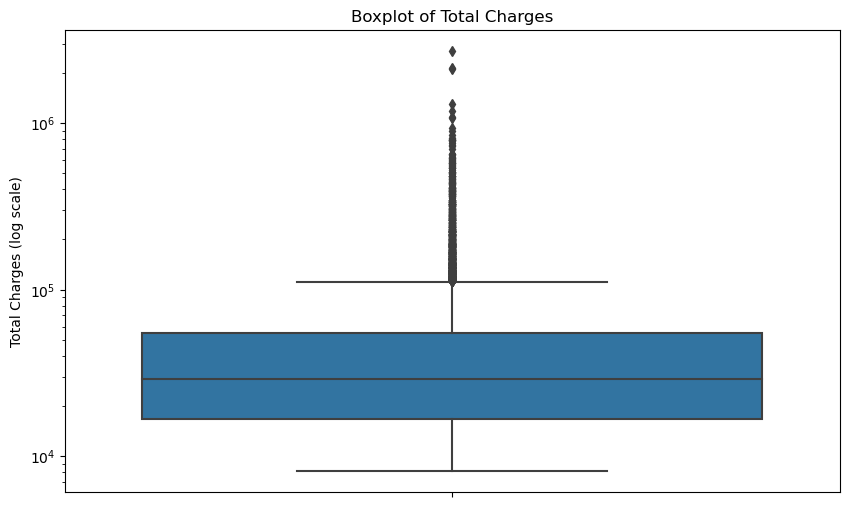

In [92]:
# Finding the distribution of costs to make better categories of charges
# Taking the 12.5th to 87.5th percentiles of the 'Total Charges' column, as the rest are too much of outliers to properly display
percentile_12_5 = df3['Total Charges'].quantile(0.125)
percentile_87_5 = df3['Total Charges'].quantile(0.875)

# Filtering the dataframe to include only values within the 12.5th and 87.5th percentiles
filtered_df = df3[(df3['Total Charges'] >= percentile_12_5) & (df['Total Charges'] <= percentile_87_5)]

# Creating the boxplot with a logarithmic scale
plt.figure(figsize=(10, 6))

sns.boxplot(data=filtered_df, y='Total Charges')
plt.yscale('log') 

# Set plot title and labels
plt.title('Boxplot of Total Charges')
plt.ylabel('Total Charges (log scale)')

plt.show()

In [93]:
# Creating categories for costs, assigning them to values 1-4 similar to Risk of Mortality values
# Done to make analysis easier; without this, MSE came out to be around 3+ billion. This way its
# easier to analyze the data.

for index, row in df3.iterrows():
    total_charges = row['Total Charges']
    # Minor Charge
    if total_charges <= 1000:
        expense_type = 1
    # Moderate Charge
    elif total_charges <= 100000:
        expense_type = 2
    # High Charge
    elif total_charges <= 1000000:
        expense_type = 3
    # Extreme Charge
    else:
        expense_type = 4
    
    # Assigning the calculated expense type to the corresponding row
    df3.at[index, 'Expense Type'] = expense_type

# Converting into an integer column
df3['Expense Type'] = df3['Expense Type'].astype(int)

df3

/var/folders/7v/y47p9sxs6fz15p9nflvx9pk40000gn/T/ipykernel_1973/3618995273.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.at[index, 'Expense Type'] = expense_type
/var/folders/7v/y47p9sxs6fz15p9nflvx9pk40000gn/T/ipykernel_1973/3618995273.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Expense Type'] = df3['Expense Type'].astype(int)


,Hospital County,Age Group,Length of Stay,Patient Disposition,Type of Admission,CCS Diagnosis Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator,Total Charges,Expense Type
0,Oneida,18 to 29,4,Home or Self Care,Emergency,102,2,Moderate,Medicare,Y,22510.26,2
1,Bronx,30 to 49,20,Home or Self Care,Elective,660,2,Minor,Medicaid,N,18418.44,2
2,Kings,0 to 17,1,Home or Self Care,Emergency,128,1,Minor,Private Health Insurance,Y,6019.28,2
3,Kings,0 to 17,2,Home or Self Care,Emergency,123,1,Minor,Blue Cross/Blue Shield,N,9746.00,2
4,Manhattan,18 to 29,3,Home or Self Care,Urgent,195,2,Minor,Medicaid,N,23107.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Bronx,0 to 17,2,Home or Self Care,Newborn,218,1,Minor,Medicaid,N,10474.62,2
9996,Monroe,70 or Older,6,Skilled Nursing Home,Emergency,2,2,Moderate,Medicare,Y,20519.37,2
9997,Queens,0 to 17,1,Home or Self Care,Emergency,143,1,Minor,Medicaid,N,26384.50,2
9998,Niagara,70 or Older,5,Home or Self Care,Emergency,99,3,Major,Medicare,Y,24845.78,2


In [94]:
# Constructing the regression model
label_2 = df3['Expense Type']

features_2 = df3.drop(columns = ['Expense Type', 'Total Charges'])
features_2 = pd.get_dummies(features_2, dtype = int)
features.head()

,Length of Stay,CCS Diagnosis Code,APR Severity of Illness Code,Hospital County_Albany,Hospital County_Allegany,Hospital County_Bronx,Hospital County_Broome,Hospital County_Cattaraugus,Hospital County_Cayuga,Hospital County_Chautauqua,...,Patient Disposition_Short-term Hospital,Patient Disposition_Skilled Nursing Home,Type of Admission_Elective,Type of Admission_Emergency,Type of Admission_Newborn,Type of Admission_Not Available,Type of Admission_Trauma,Type of Admission_Urgent,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,2,233,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4,108,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,4,95,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,660,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,657,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [95]:
# Splitting data
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_2, label_2)

In [96]:
# Fitting linear regression model and creating predictions to be mapped to a list and compared
model_2 = LinearRegression().fit(X_train2, y_train2)

predicted_2 = model_2.predict(X_test2)

predicted_2 = predicted_2.tolist()

# Displaying the predictions

for x in range(len(predicted_2)):

    # Rounding and assigning values less than one to one, and greater than four to four for the same reasons as previous analysis
    predicted_2[x] = round(predicted_2[x])

    if predicted_2[x] > 4:
        predicted_2[x] = 4
    elif predicted_2[x] < 1:
        predicted_2[x] = 1

print(predicted_2)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [97]:
# Actual categories
actual_2 = y_test
actual_2

[4,
 1,
 1,
 4,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 4,
 4,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 3,
 3,
 2,
 4,
 1,
 4,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 4,
 3,
 3,
 4,
 2,
 3,
 1,
 4,
 1,
 2,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 4,
 4,
 1,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 4,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 4,
 2,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 1,


In [98]:
# Mean Squared Error of this model approx 100%
mse(predicted_2, actual_2)

0.9951865222623345